In [1]:
import pandas as pd

In [2]:
# Lê as planilhas do excel
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
# concatena todas as planilhas
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
# altera o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [5]:
# apagando as linhas com valores nulos com base em 1 coluna
df.dropna(subset = ["Vendas"], inplace = True)

In [6]:
# criando uma nova coluna chamada Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [7]:
# criando uma nova coluna chamada Receita/Vendas
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [8]:
# transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

C:\Users\Rafael\AppData\Local\Temp/ipykernel_12776/2525809074.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df["Data"] = df["Data"].astype("int64")


In [9]:
# transformando a coluna Data em data
df["Data"] = pd.to_datetime(df["Data"])

In [10]:
# Criando uma nova coluna com o ano
df["Ano Venda"] = df["Data"].dt.year

In [11]:
# extraindo o mês e o dia
df["Mês Venda"], df["Dia Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [12]:
# calcula a diferença de dias
df["Diferença Dias"] = df["Data"] - df["Data"].min()

In [13]:
# criando a coluna de trimestre
df["Trimestre Venda"] = df["Data"].dt.quarter

In [14]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,Mês Venda,Dia Venda,Diferença Dias,Trimestre Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days,1


In [15]:
df["LojaID"].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

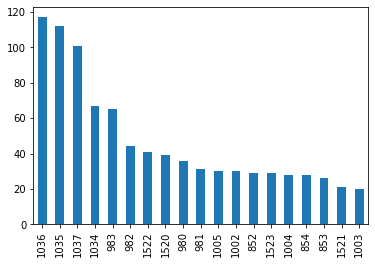

In [16]:
# Gráfico de Barras
df["LojaID"].value_counts(ascending = False).plot.bar()

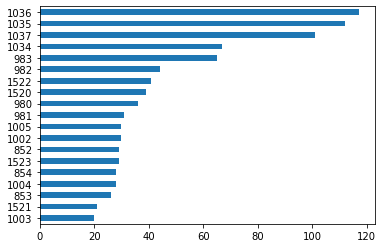

In [20]:
# Gráfico de barras horizontais
df["LojaID"].value_counts(ascending = True).plot.barh();

<AxesSubplot:ylabel='Receita'>

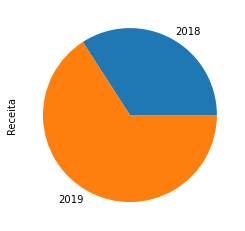

In [21]:
# Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [22]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

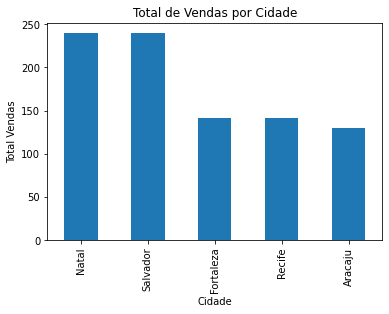

In [23]:
# Adicionando título e os nomes dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

Text(0, 0.5, 'Total de Vendas')

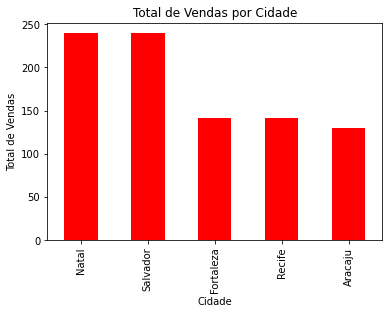

In [24]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title = "Total de Vendas por Cidade", color = "red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

In [25]:
plt.style.use("ggplot")

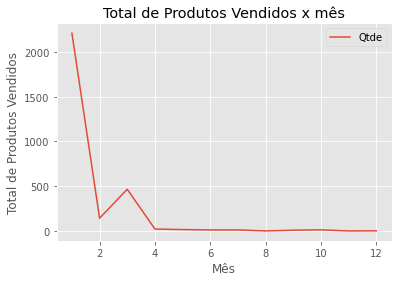

In [27]:
df.groupby(df["Mês Venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

In [28]:
df.groupby(df["Mês Venda"])["Qtde"].sum()

Mês Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [30]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano Venda"] == 2019]

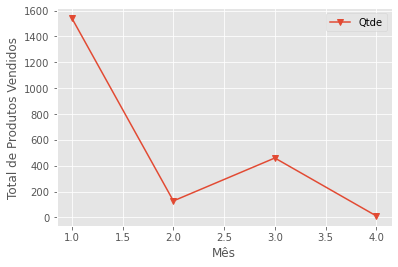

In [32]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mês Venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

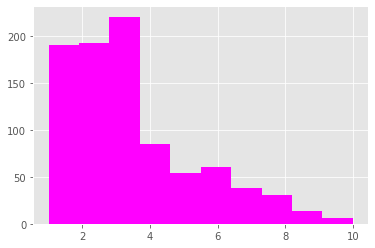

In [33]:
# Histograma
plt.hist(df["Qtde"], color = "magenta");

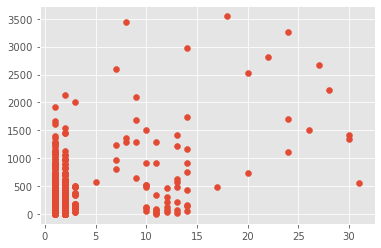

In [34]:
# gráfico de dispersão 
plt.scatter(x = df_2019["Dia Venda"], y = df_2019["Receita"]);

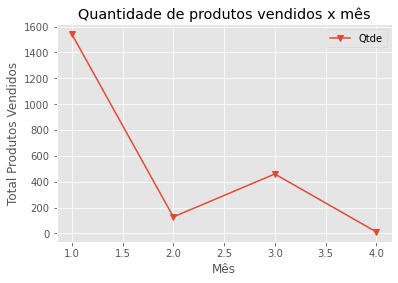

In [36]:
# Salvando em png
df_2019.groupby(df_2019["Mês Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("Gráfico Qtde X Mês.png");